In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fachrulfirman","key":"f02156c6479c81184a505e2d79220023"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download 'duttadebadri/image-classification'

100% 2.33G/2.34G [00:16<00:00, 158MB/s]
100% 2.34G/2.34G [00:16<00:00, 151MB/s]


In [ ]:
! unzip image-classification.zip -d /content/datasets

Streaming output truncated to the last 5000 lines.
  inflating: /content/datasets/images/images/travel and  adventure/Places365_val_00009663.jpg  
  inflating: /content/datasets/images/images/travel and  adventure/Places365_val_00009664.jpg  
  inflating: /content/datasets/images/images/travel and  adventure/Places365_val_00009665.jpg  
  inflating: /content/datasets/images/images/travel and  adventure/Places365_val_00009666.jpg  
  inflating: /content/datasets/images/images/travel and  adventure/Places365_val_00009667.jpg  
  inflating: /content/datasets/images/images/travel and  adventure/Places365_val_00009668.jpg  
  inflating: /content/datasets/images/images/travel and  adventure/Places365_val_00009669.jpg  
  inflating: /content/datasets/images/images/travel and  adventure/Places365_val_00009670.jpg  
  inflating: /content/datasets/images/images/travel and  adventure/Places365_val_00009671.jpg  
  inflating: /content/datasets/images/images/travel and  adventure/Places365_val_0000

In [ ]:
images_dir = '/content/datasets/images/images'
test_dir = '/content/datasets/test/test'
validation_dir = '/content/datasets/validation/validation'

In [ ]:
import tensorflow as tf
train_img = tf.keras.preprocessing.image_dataset_from_directory(
    batch_size = 100,
    directory = images_dir,
    image_size = (255, 255),
    seed = 48,
    subset='training',
    validation_split=0.2
)

validation_img = tf.keras.preprocessing.image_dataset_from_directory(
    batch_size = 100,
    directory = validation_dir,
    image_size = (255, 255),
    seed=48,
    subset='validation',
    validation_split=0.8
)

Found 35093 files belonging to 4 classes.
Using 28075 files for training.
Found 122 files belonging to 4 classes.
Using 97 files for validation.


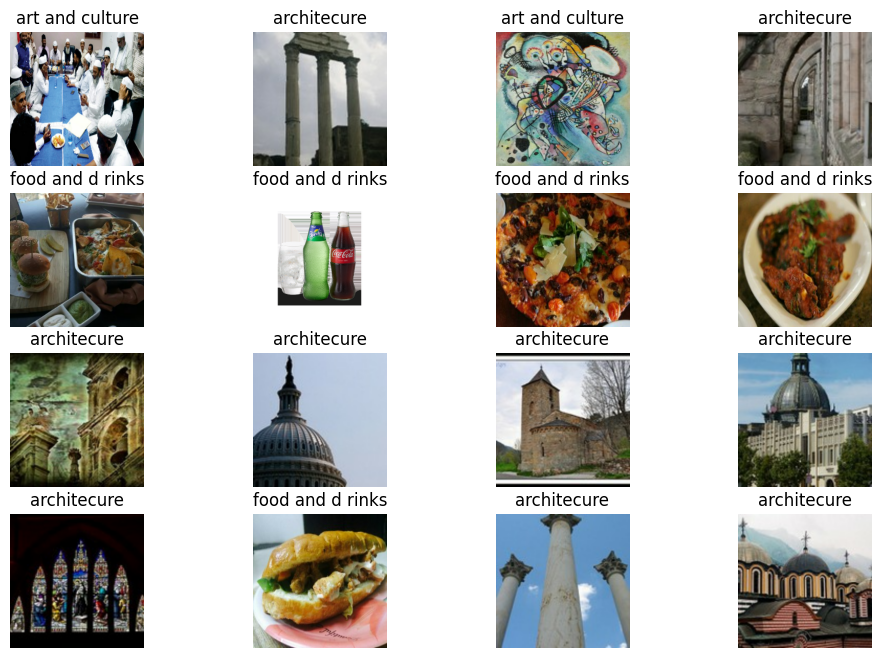

In [ ]:
import matplotlib.pyplot as plt
class_img = train_img.class_names
plt.figure(figsize = (12, 8))
for images, labels in train_img.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_img[int(labels[i])])
    plt.axis('off')

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (255, 255, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(4)
])

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

history = model.fit(train_img, epochs = 4, validation_data = (validation_img))

Epoch 1/4
281/281 [==============================] - 2360s 8s/step - loss: 0.8640 - accuracy: 0.6527 - val_loss: 1.0642 - val_accuracy: 0.7010
Epoch 2/4
281/281 [==============================] - 2378s 8s/step - loss: 0.4596 - accuracy: 0.8326 - val_loss: 1.1167 - val_accuracy: 0.7320
Epoch 3/4
281/281 [==============================] - 2377s 8s/step - loss: 0.3251 - accuracy: 0.8837 - val_loss: 1.8459 - val_accuracy: 0.7320
Epoch 4/4
281/281 [==============================] - 2365s 8s/step - loss: 0.2472 - accuracy: 0.9097 - val_loss: 2.1315 - val_accuracy: 0.7938


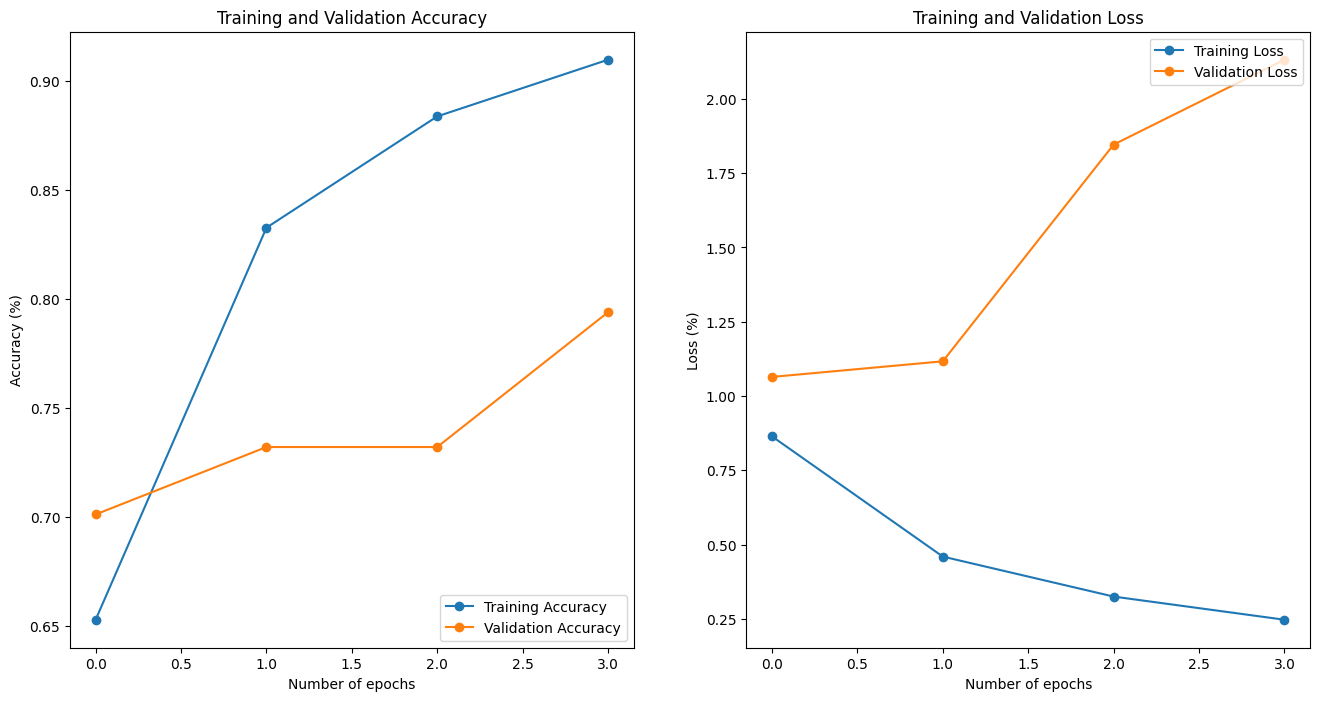

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc,'o-',label = 'Training Accuracy')
plt.plot(epochs, val_acc,'o-', label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs, loss,'o-', label = 'Training Loss')
plt.plot(epochs, val_loss,'o-', label = 'Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Number of epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss')
plt.show()

Saving test3.jpg to test3 (3).jpg
1/1 [==============================] - 0s 37ms/step


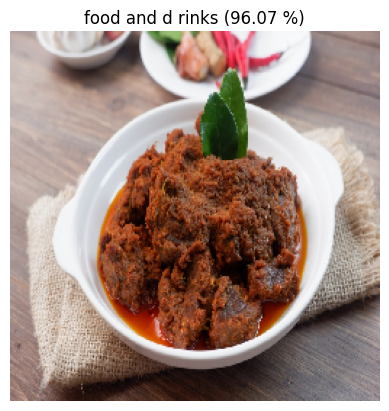

In [ ]:
from google.colab import files
from tensorflow import keras
from skimage import io
upload_img = files.upload()
for uimg in upload_img.keys():
  img = keras.preprocessing.image.load_img(uimg, target_size=(255, 255))
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  classification = model.predict(img_array)
  score = tf.nn.softmax(classification[0])
  percent_confidence = 100 * np.max(score)
  plt.title(class_img[np.argmax(score)]+' ('+str (round(percent_confidence,2))+' %)')
  plt.imshow(img)
  plt.axis('off')